In [1]:
import pickle
import numpy as np
import pandas as pd
import category_encoders as ce
from sklearn.manifold import TSNE
import plotly.graph_objects as go

In [5]:
# Load data
pickleFile = open("../assets/clean_mushroom_data.pkl", 'rb')
mushrooms = pickle.load(pickleFile)
pickleFile.close()

In [6]:
#### Create features and target and train test split
X = mushrooms.drop(columns='class')
X = ce.OneHotEncoder(use_cat_names=True).fit_transform(X)
y = mushrooms['class'].replace({'p':0, 'e':1})

In [109]:
X_embedded = TSNE(n_components=2).fit_transform(X)

(8124, 2)

In [113]:
import pickle

pickleFile = open("feature_embeddings.pkl", 'wb')
pickle.dump(X_embedded, pickleFile)
pickleFile.close()

In [111]:
data = pd.DataFrame(X_embedded)
data['class'] = y
data.columns = ['comp_1', 'comp_2', 'class']
data.head()

poison = data[data['class'] == 0]
edible = data[data['class'] == 1]

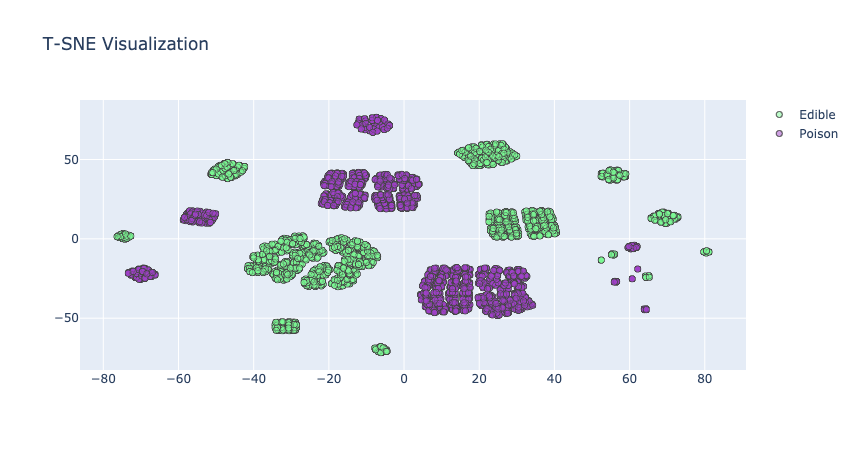

In [112]:
fig = go.Figure()

fig.add_trace(go.Scattergl(
    x=edible["comp_1"],
    y=edible["comp_2"],
    name = "Edible",
    mode='markers',
    marker=dict(
        color='rgba(124, 250, 149, .5)',
        line_width=1
    )
))

fig.add_trace(go.Scattergl(
    x=poison["comp_1"],
    y=poison["comp_2"],
    name = "Poison",
    mode='markers',
    marker=dict(
        color='rgba(160, 65, 201, .5)',
        line_width=1
    )
))

fig.update_layout(title="T-SNE Visualization",
                  yaxis_zeroline=False, xaxis_zeroline=False)

fig.show()

In [7]:
X_embedded = TSNE(n_components=3).fit_transform(X)

In [8]:
data = pd.DataFrame(X_embedded)
data['class'] = y
data.columns = ['comp_1', 'comp_2', 'comp_3', 'class']

poison = data[data['class'] == 0]
edible = data[data['class'] == 1]

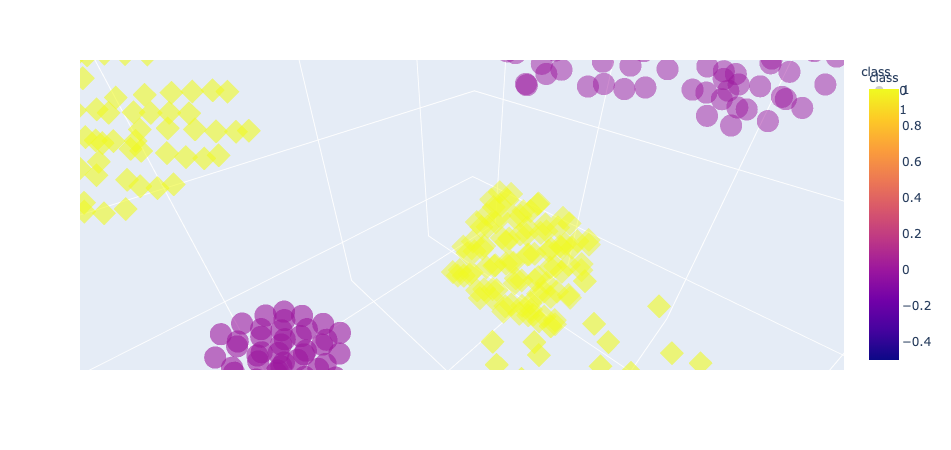

In [17]:
import plotly.express as px

fig = px.scatter_3d(data, x='comp_1', y='comp_2', z='comp_3',
              color='class',
              symbol='class',
              opacity=0.2)
fig.show()

In [13]:
import pickle

pickleFile = open("../assets/3d_feature_embeddings.pkl", 'wb')
pickle.dump(X_embedded, pickleFile)
pickleFile.close()

# 3D Embedding Scatter

In [ ]:
import plotly.graph_objects as go
import numpy as np

In [26]:
# Load data
pickleFile = open("../assets/clean_mushroom_data.pkl", 'rb')
mushrooms = pickle.load(pickleFile)
pickleFile.close()

pickleFile = open("../assets/3d_feature_embeddings.pkl", 'rb')
embeddings = pickle.load(pickleFile)
pickleFile.close()

y = mushrooms['class'].replace({'p':0, 'e':1})

data = pd.DataFrame(embeddings)
data['class'] = y
data.columns = ['comp_1', 'comp_2', 'comp_3', 'class']

poison = data[data['class'] == 0]
edible = data[data['class'] == 1]

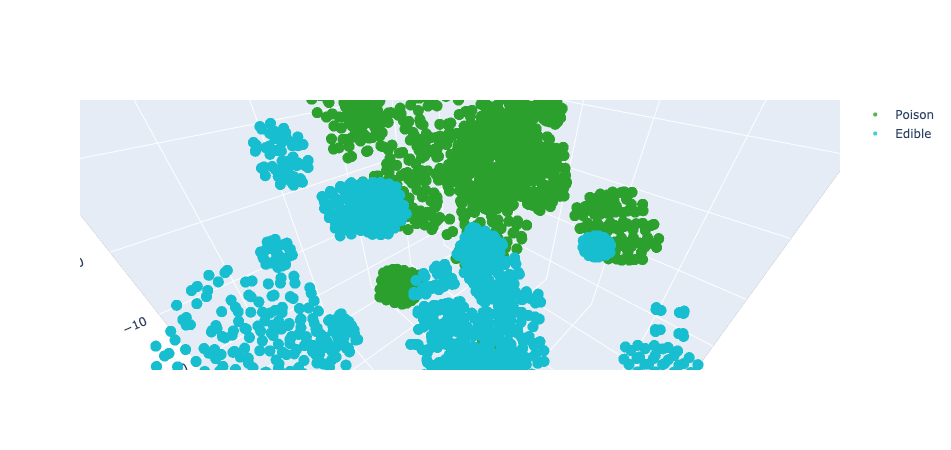

In [41]:
fig = go.Figure()

fig.add_trace(
    go.Scatter3d(
        x=poison['comp_1'], y=poison['comp_2'], z=poison['comp_3'],
        name = 'Poison',
        mode='markers',
        marker=dict(
            size=4,
            color='#2ca02c',
            opacity=0.8
        ),
    )
)

fig.add_trace(go.Scatter3d(
    x=edible['comp_1'], y=edible['comp_2'], z=edible['comp_3'],
    name = 'Edible',
    mode='markers',
    marker=dict(
        size=4,
        color='#17becf',
        opacity=0.8
    )
))


fig.update_layout(showlegend=True)

fig.show()